In [3]:
import pyemma
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
from glob import glob
import scipy

In [2]:
scores = [
np.load('scores_msmlag10ns_splittica_alleigen.npy'),
np.load('50ns/scores_msmlag50ns_splittica_alleigen.npy'),
np.load('100ns/scores_msmlag100ns_splittica_alleigen.npy')
]

In [3]:
def get_order_lag(no_eigenvalues, lag):
    
    current_choice = no_eigenvalues  # number of eigenvalues

    # lag is 0, 1 or 2 meaning 10ns, 50ns, 100ns
    
    output = scores[lag]
    
    #output = scores
    eigenvalues_no = 49 # how many numbers of eigenvalues we've tried
    eigenvalues_index = current_choice - 2 # this is actual number of eigenvalues - 2

    # test scores

    y_kinetic = []
    y_commute = []
    tic_nos_kinetic = []
    tic_nos_commute = []

    for model in output[1]:
        y_kinetic_ = []
        y_commute_ = []
        tic_nos_kinetic_ = []
        tic_nos_commute_ = []
        if isinstance(model[0], list):
            for replicate in model[eigenvalues_index::eigenvalues_no]:
                y_kinetic_.append(replicate[0][0])
                y_commute_.append(replicate[0][1])
                tic_nos_kinetic_.append(replicate[1][0])
                tic_nos_commute_.append(replicate[1][1])
        else:
            for replicate in model[eigenvalues_index::eigenvalues_no]:
                y_kinetic_.append(replicate[0])
                y_commute_.append(replicate[1])
        y_kinetic.append(np.array(y_kinetic_))
        y_commute.append(np.array(y_commute_))
        if tic_nos_kinetic_:
            tic_nos_kinetic.append(np.max(tic_nos_kinetic_))
        else:
            tic_nos_kinetic.append(None)
        if tic_nos_commute_:
            tic_nos_commute.append(np.max(tic_nos_commute_))
        else:
            tic_nos_commute.append(None)

    y = y_kinetic + y_commute

    x = []

    for index, model in enumerate(output[0]):
        if tic_nos_kinetic[index]:
            x.append(str(('kinetic', model[0], str(model[1]) + ': ' + str(tic_nos_kinetic[index]), model[2], model[3])))
        else:
            x.append(str(('kinetic', model[0], model[1], model[2], model[3])))
    for index, model in enumerate(output[0]):
        if tic_nos_commute[index]:
            x.append(str(('commute', model[0], str(model[1]) + ': ' + str(tic_nos_commute[index]), model[2], model[3])))
        else:
            x.append(str(('commute', model[0], model[1], model[2], model[3])))

    order_means = []
    #just_means = []
    for index, model in enumerate(x):
        order_means.append((model, np.mean(y[index])))
        #just_means.append(np.mean(y[index]))
    order_means = sorted(order_means, key = lambda i: i[1], reverse=True)
    order = [i[0] for i in order_means]
    
#     # for those with 95p tics, remove the number of tics, so the labels between two nos of eigen are the same
#     order_ = []
#     for model in order:
#         split = model.split(', ')
#         if split[2][:4] == "'95p":
#             new_model = split[0] + ", " + split[1] + ", " + split[2][:4] + "', " + split[3] + ")"
#             order_.append(new_model)
#         else:
#             new_model = split[0] + ", " + split[1] + ", " + split[2] + ", " + split[3] + ")"
#             order_.append(new_model)
            
    
#     return order_


    # for those with 95p tics, remove the 95p so we can read number of tics into MSM making script
    order_ = []
    for model in order:
        split = model.split(', ')
        if split[2][:4] == "'95p":
            new_model = split[0] + ", " + split[1] + ", " + split[2][6:-1] + ", " + split[3] + ")"
            order_.append(new_model)
        else:
            new_model = split[0] + ", " + split[1] + ", " + split[2] + ", " + split[3] + ")"
            order_.append(new_model)
    
    return order_

In [4]:
get_order_lag(16,0)

["('kinetic', 1, 10, 100)",
 "('commute', 1, 10, 100)",
 "('commute', 1, 10, 50)",
 "('commute', 1, 10, 200)",
 "('kinetic', 1, 10, 200)",
 "('kinetic', 1, 50, 100)",
 "('kinetic', 1, 10, 50)",
 "('kinetic', 1, 50, 50)",
 "('kinetic', 1, 100, 100)",
 "('kinetic', 1, 300, 50)",
 "('kinetic', 1, 100, 50)",
 "('commute', 1, 10, 400)",
 "('commute', 1, 50, 100)",
 "('kinetic', 1, 10, 400)",
 "('commute', 1, 50, 50)",
 "('kinetic', 1, 500, 100)",
 "('kinetic', 1, 300, 100)",
 "('commute', 1, 100, 50)",
 "('kinetic', 1, 500, 50)",
 "('commute', 1, 100, 100)",
 "('kinetic', 1, 100, 200)",
 "('commute', 1, 50, 200)",
 "('commute', 1, 10, 600)",
 "('kinetic', 1, 50, 200)",
 "('kinetic', 1, 10, 600)",
 "('kinetic', 1, 500, 200)",
 "('kinetic', 1, 50, 400)",
 "('kinetic', 1, 300, 200)",
 "('commute', 1, 100, 200)",
 "('commute', 1, 300, 50)",
 "('commute', 1, 10, 800)",
 "('kinetic', 1, 10, 800)",
 "('commute', 1, 50, 400)",
 "('kinetic', 1, 500, 400)",
 "('kinetic', 1, 100, 400)",
 "('commute', 

In [5]:
len(get_order_lag(16,0))

98

In [6]:
len(get_order_lag(16,0)) / 9

10.88888888888889

In [10]:
np.array(list(np.arange(0,98,11)) + [97])

array([ 0, 11, 22, 33, 44, 55, 66, 77, 88, 97])

In [11]:
np.array(get_order_lag(16,0))[np.array(list(np.arange(0,98,11)) + [97])]

array(["('kinetic', 1, 10, 100)", "('commute', 1, 10, 400)",
       "('commute', 1, 10, 600)", "('kinetic', 1, 500, 400)",
       "('commute', 1, 456, 200)", "('commute', 1, 2, 200)",
       "('commute', 1, 2, 800)", "('commute', 1, 50, 800)",
       "('commute', 1, 100, 800)", "('commute', 1, 456, 1000)"], 
      dtype='<U25')

In [1]:
# back with dtrajs from lilac

In [12]:
import numpy as _np
from pyemma.util.types import  is_iterable_of_int as _is_iterable_of_int, is_int as _is_int

def plot_implied_timescales(ITS, ax=None, outfile=None, show_mle=True, show_mean=True,
                            xlog=False, ylog=True, confidence=0.95, refs=None, nits=-1,
                            process=None, units='steps', dt=1., colors = ['blue'], **kwargs):
    r"""Implied timescale plot
    Parameters
    ----------
    ITS : implied timescales object.
        Object whose data will be plotted. Must provide the functions: get_timescales() and get_timescales(i) where i is the
        the property samples_available
    ax : matplotlib Axes object, optional, default = None
        the axes to plot to. When set to None the default Axes object will be used.
    outfile : str, optional, default = None
        output file to write the figure to. When not given, the plot will be displayed
    show_mean : bool, default = True
        Line for mean value will be shown, if available
    show_mle : bool, default = True
        Line for maximum likelihood estimate will be shown
    xlog : bool, optional, default = False
        Iff true, the x-Axis is logarithmized
    ylog : bool, optional, default = True
        Iff true, the y-Axis is logarithmized
    confidence : float, optional, default = 0.95
        The confidence interval for plotting error bars (if available)
    refs : ndarray((m), dtype=float), optional, default = None
        Reference (exact solution or other reference) timescales if known. The number of timescales must match those
        in the ITS object
    nits: integer, default = -1
        Number of implied timescales to be shown. The default behaviour (-1) is to show all timescales available.
        :py:obj:`nits` != -1 and :py:obj:`process` != None are mutually exclusive
    process : iterable of integers, default is None
        list or ndarray((m), dtype=int) containing a list of the processes to be shown. The default behaviour is
        to show all timescales available.
        :py:obj:`process` != None and :py:obj:`nits` != -1 are mutually exclusive
    units: str or list (len=2) of strings, optional, default = 'steps'
        Affects the labeling of the axes. Used with :py:obj:`dt`, allows for changing the physical units of the axes.
        Accepts simple LaTeX math strings, eg. '$\mu$s'
        If this parameter is a list, it will be assumed that units[0] is for the x-axis and units[1] for the y-axis.
    dt: float or list(len=2) of floats, optional, default = 1.0
        Physical time between frames, expressed the units given in :py:obj:`units`. E.g, if you know that each
        frame corresponds to .010 ns, you can use the combination of parameters :py:obj:`dt` =0.01,
        :py:obj:`units` ='ns' to display the implied timescales in ns (instead of frames)
        If this parameter is a list, it will be assumed that dt[0] is for the x-axis and dt[1] for the y-axis.
    **kwargs: Will be passed to pyplot.plot when plotting the MLE datapoints (not the bootstrapped means).
            See the doc of pyplot for more options. Most useful lineproperties like `marker='o'` and/or :markersize=5
    Returns
    -------
    ax : Axes object containing the plot
    """
    import matplotlib.pyplot as _plt
    # check input
    if ax is None:
        ax = _plt.gca()
    #colors = ['blue', 'red', 'green', 'cyan', 'purple', 'orange', 'violet']
    lags = ITS.lagtimes
    xmax = _np.max(lags)
    srt = _np.argsort(lags)
    # Check the processes to be shown
    if process is not None:
        if nits != -1:
            raise TypeError(
                'optional arguments nits and process are mutually exclusive:', nits, process)
        if not _is_iterable_of_int(process):
            raise ValueError('process has to be an iterable of integers')
        if _np.max(process)+1 > ITS.number_of_timescales:
            raise ValueError(
                'requested process %u, whereas ITS only contains %u timescales' % (
                    _np.max(process), ITS.number_of_timescales))
        # Now that it's for sure that nits==-1, process is iter_of_ints, and the requested processes exist in its object:
        its_idx = process
    else:
        if not _is_int(nits):
            raise TypeError('nits is not an integer, ',nits)
        if nits == -1:
            nits = ITS.number_of_timescales
        its_idx = _np.arange(ITS.number_of_timescales)[:nits]
    # Check units and dt for user error.
    if isinstance(units, list) and len(units) != 2:
        raise TypeError("If units is a list, len(units) has to be = 2")
    if isinstance(dt, list) and len(dt) != 2:
        raise TypeError("If dt is a list, len(dt) has to be = 2")
    # Create list of units and dts for different axis
    if isinstance(units, str):
        units = [units] * 2
    if isinstance(dt, (float, int)):
        dt = [dt] * 2
    #ymin = min(_np.min(lags), _np.min(ITS.get_timescales()))
    #ymax = 1.5*_np.min(ITS.get_timescales())
    for i in its_idx:
        # plot estimate
        if show_mle:
            ax.plot(
                lags[srt] * dt[0], ITS.get_timescales(process=i)[srt] * dt[1],
                color=colors[i % len(colors)], **kwargs)
        # sample available?
        if ITS.samples_available:# and ITS.sample_number_of_timescales > i):
            # plot sample mean
            if show_mean:
                ax.plot(
                    lags[srt] * dt[0], ITS.get_sample_mean(process=i)[srt] * dt[1], marker='o',
                    color=colors[i % len(colors)], linestyle='dashed')
            (lconf, rconf) = ITS.get_sample_conf(confidence, i)
            ax.fill_between(
                lags[srt] * dt[0], lconf[srt] * dt[1], rconf[srt] * dt[1],
                alpha=0.2, color=colors[i % len(colors)])
        # reference available?
        if refs is not None:
            tref = refs[i] * dt[1]
            ax.plot([0, min(tref, xmax) * dt[0]], [tref, tref], color='black', linewidth=1)
    # cutoff
    ax.plot(lags[srt] * dt[0], lags[srt] * dt[1], linewidth=2, color='black')
    ax.set_xlim([1.0 * dt[0], xmax * dt[0]])
    #ax.set_ylim([ymin,ymax])
    ax.fill_between(
        lags[srt] * dt[0], ax.get_ylim()[0]*_np.ones(len(lags))*dt[1], lags[srt] * dt[1],
        alpha=0.5, color='grey')
    # formatting
    ax.set_xlabel('lag time / %s' % units[0])
    ax.set_ylabel('timescale / %s' % units[1])
    if (xlog):
        ax.set_xscale('log')
    if (ylog):
        ax.set_yscale('log')
    # show or save
    # if outfile is None:
    #    _plt.show()
    if outfile is not None:
        _plt.savefig(outfile)
    return ax

In [4]:
all_dtrajs = np.load('good_med_bad/dtrajs_goodmedbad_models.npy')

In [11]:
len(all_dtrajs)

10

In [5]:
# ITS

In [6]:
all_itss = []

In [8]:
for dtraj in all_dtrajs:
    its = pyemma.msm.its(list(dtraj), 500*5)
    all_itss.append(its)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=20), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=20), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=20), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=20), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=20), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=20), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=20), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=20), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

02-10-18 15:44:07 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[8] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=20), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=20), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

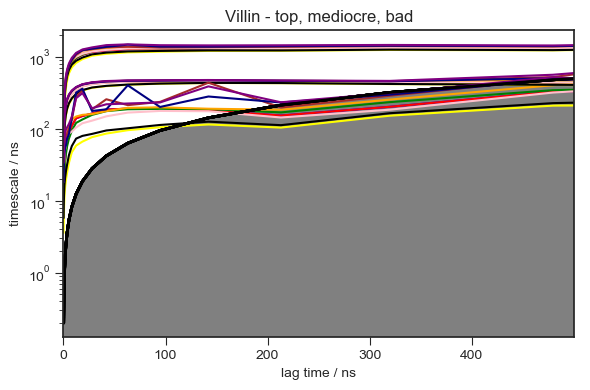

In [191]:
nits = 3

plt.figure(dpi=100)
plot_implied_timescales(all_itss[1], ylog=False, dt=0.2, units='ns', nits=nits, colors=['blue'], show_mean=True, label='1')
plot_implied_timescales(all_itss[1], ylog=False, dt=0.2, units='ns', nits=nits, colors=['red'], show_mean=True, label='2')
plot_implied_timescales(all_itss[2], ylog=False, dt=0.2, units='ns', nits=nits, colors=['green'], show_mean=True, label='3')
plot_implied_timescales(all_itss[3], ylog=False, dt=0.2, units='ns', nits=nits, colors=['orange'], show_mean=True, label='4')
plot_implied_timescales(all_itss[4], ylog=False, dt=0.2, units='ns', nits=nits, colors=['pink'], show_mean=True, label='5')
plot_implied_timescales(all_itss[5], ylog=False, dt=0.2, units='ns', nits=nits, colors=['yellow'], show_mean=True, label='6')
plot_implied_timescales(all_itss[6], ylog=False, dt=0.2, units='ns', nits=nits, colors=['black'], show_mean=True, label='7')
plot_implied_timescales(all_itss[7], ylog=False, dt=0.2, units='ns', nits=nits, colors=['brown'], show_mean=True, label='8')
plot_implied_timescales(all_itss[8], ylog=False, dt=0.2, units='ns', nits=nits, colors=['navy'], show_mean=True, label='9')
plot_implied_timescales(all_itss[9], ylog=False, dt=0.2, units='ns', nits=nits, colors=['purple'], show_mean=True, label='10')
#plt.legend()
#plt.axvline(10, c='red')
plt.title('Villin - top, mediocre, bad')
plt.xticks(np.arange(0,500,100))
plt.yscale('log')
plt.tight_layout()

In [192]:
# nits = 2

# plt.figure(dpi=100)
# plot_implied_timescales(all_itss[0], ylog=False, dt=0.2, units='ns', nits=nits, colors=['blue'], show_mean=True, label='1')
# plot_implied_timescales(all_itss[1], ylog=False, dt=0.2, units='ns', nits=nits, colors=['red'], show_mean=True, label='2')
# plot_implied_timescales(all_itss[2], ylog=False, dt=0.2, units='ns', nits=nits, colors=['green'], show_mean=True, label='3')
# plot_implied_timescales(all_itss[3], ylog=False, dt=0.2, units='ns', nits=nits, colors=['orange'], show_mean=True, label='4')
# plot_implied_timescales(all_itss[4], ylog=False, dt=0.2, units='ns', nits=nits, colors=['pink'], show_mean=True, label='5')
# plot_implied_timescales(all_itss[5], ylog=False, dt=0.2, units='ns', nits=nits, colors=['yellow'], show_mean=True, label='6')
# plot_implied_timescales(all_itss[6], ylog=False, dt=0.2, units='ns', nits=nits, colors=['black'], show_mean=True, label='7')
# plot_implied_timescales(all_itss[7], ylog=False, dt=0.2, units='ns', nits=nits, colors=['brown'], show_mean=True, label='8')
# plot_implied_timescales(all_itss[8], ylog=False, dt=0.2, units='ns', nits=nits, colors=['navy'], show_mean=True, label='9')
# plot_implied_timescales(all_itss[9], ylog=False, dt=0.2, units='ns', nits=nits, colors=['purple'], show_mean=True, label='10')
# #plt.legend()
# #plt.axvline(10, c='red')
# plt.title('Villin 100 ns - top, mediocre, bad')
# plt.xticks(np.arange(0,500,100))
# #plt.yscale('log')
# plt.tight_layout()

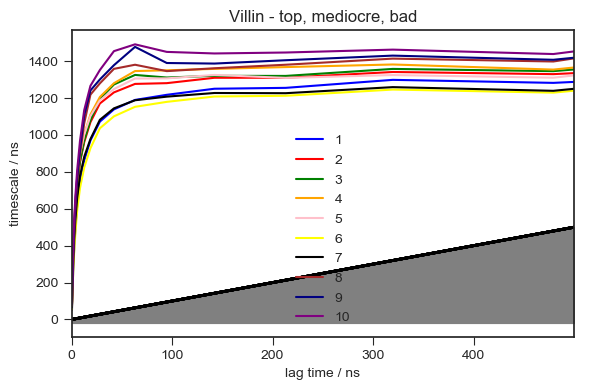

In [193]:
process = [0]

plt.figure(dpi=100)
plot_implied_timescales(all_itss[0], ylog=False, dt=0.2, units='ns', process=process, colors=['blue'], show_mean=True, label='1')
plot_implied_timescales(all_itss[1], ylog=False, dt=0.2, units='ns', process=process, colors=['red'], show_mean=True, label='2')
plot_implied_timescales(all_itss[2], ylog=False, dt=0.2, units='ns', process=process, colors=['green'], show_mean=True, label='3')
plot_implied_timescales(all_itss[3], ylog=False, dt=0.2, units='ns', process=process, colors=['orange'], show_mean=True, label='4')
plot_implied_timescales(all_itss[4], ylog=False, dt=0.2, units='ns', process=process, colors=['pink'], show_mean=True, label='5')
plot_implied_timescales(all_itss[5], ylog=False, dt=0.2, units='ns', process=process, colors=['yellow'], show_mean=True, label='6')
plot_implied_timescales(all_itss[6], ylog=False, dt=0.2, units='ns', process=process, colors=['black'], show_mean=True, label='7')
plot_implied_timescales(all_itss[7], ylog=False, dt=0.2, units='ns', process=process, colors=['brown'], show_mean=True, label='8')
plot_implied_timescales(all_itss[8], ylog=False, dt=0.2, units='ns', process=process, colors=['navy'], show_mean=True, label='9')
plot_implied_timescales(all_itss[9], ylog=False, dt=0.2, units='ns', process=process, colors=['purple'], show_mean=True, label='10')
plt.legend()
#plt.axvline(10, c='red')
plt.title('Villin - top, mediocre, bad')
plt.xticks(np.arange(0,500,100))
#plt.yscale('log')
plt.tight_layout()

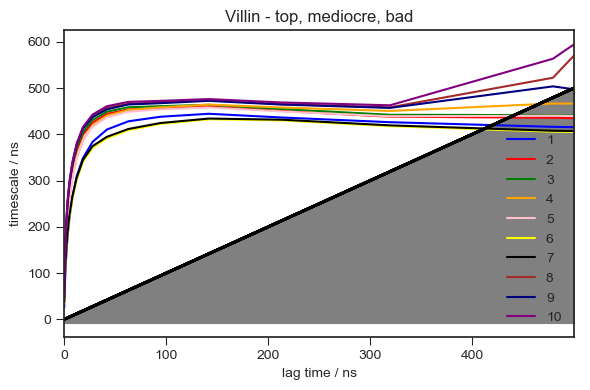

In [194]:
process = [1]

plt.figure(dpi=100)
plot_implied_timescales(all_itss[0], ylog=False, dt=0.2, units='ns', process=process, colors=['blue'], show_mean=True, label='1')
plot_implied_timescales(all_itss[1], ylog=False, dt=0.2, units='ns', process=process, colors=['red'], show_mean=True, label='2')
plot_implied_timescales(all_itss[2], ylog=False, dt=0.2, units='ns', process=process, colors=['green'], show_mean=True, label='3')
plot_implied_timescales(all_itss[3], ylog=False, dt=0.2, units='ns', process=process, colors=['orange'], show_mean=True, label='4')
plot_implied_timescales(all_itss[4], ylog=False, dt=0.2, units='ns', process=process, colors=['pink'], show_mean=True, label='5')
plot_implied_timescales(all_itss[5], ylog=False, dt=0.2, units='ns', process=process, colors=['yellow'], show_mean=True, label='6')
plot_implied_timescales(all_itss[6], ylog=False, dt=0.2, units='ns', process=process, colors=['black'], show_mean=True, label='7')
plot_implied_timescales(all_itss[7], ylog=False, dt=0.2, units='ns', process=process, colors=['brown'], show_mean=True, label='8')
plot_implied_timescales(all_itss[8], ylog=False, dt=0.2, units='ns', process=process, colors=['navy'], show_mean=True, label='9')
plot_implied_timescales(all_itss[9], ylog=False, dt=0.2, units='ns', process=process, colors=['purple'], show_mean=True, label='10')
plt.legend()
#plt.axvline(10, c='red')
plt.title('Villin - top, mediocre, bad')
plt.xticks(np.arange(0,500,100))
#plt.yscale('log')
plt.tight_layout()

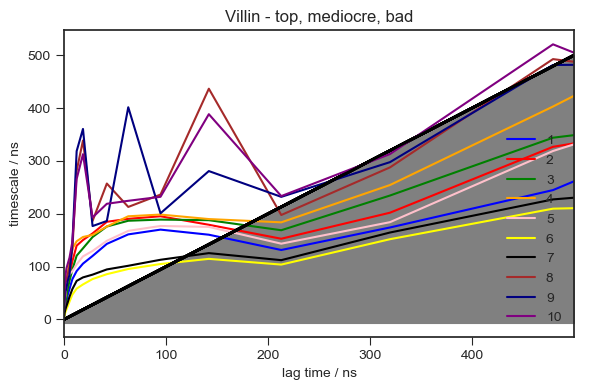

In [195]:
process = [2]

plt.figure(dpi=100)
plot_implied_timescales(all_itss[0], ylog=False, dt=0.2, units='ns', process=process, colors=['blue'], show_mean=True, label='1')
plot_implied_timescales(all_itss[1], ylog=False, dt=0.2, units='ns', process=process, colors=['red'], show_mean=True, label='2')
plot_implied_timescales(all_itss[2], ylog=False, dt=0.2, units='ns', process=process, colors=['green'], show_mean=True, label='3')
plot_implied_timescales(all_itss[3], ylog=False, dt=0.2, units='ns', process=process, colors=['orange'], show_mean=True, label='4')
plot_implied_timescales(all_itss[4], ylog=False, dt=0.2, units='ns', process=process, colors=['pink'], show_mean=True, label='5')
plot_implied_timescales(all_itss[5], ylog=False, dt=0.2, units='ns', process=process, colors=['yellow'], show_mean=True, label='6')
plot_implied_timescales(all_itss[6], ylog=False, dt=0.2, units='ns', process=process, colors=['black'], show_mean=True, label='7')
plot_implied_timescales(all_itss[7], ylog=False, dt=0.2, units='ns', process=process, colors=['brown'], show_mean=True, label='8')
plot_implied_timescales(all_itss[8], ylog=False, dt=0.2, units='ns', process=process, colors=['navy'], show_mean=True, label='9')
plot_implied_timescales(all_itss[9], ylog=False, dt=0.2, units='ns', process=process, colors=['purple'], show_mean=True, label='10')
plt.legend()
#plt.axvline(10, c='red')
plt.title('Villin - top, mediocre, bad')
plt.xticks(np.arange(0,500,100))
#plt.yscale('log')
plt.tight_layout()

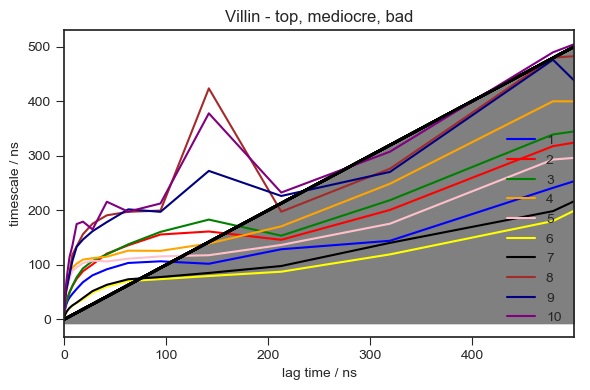

In [196]:
process = [3]

plt.figure(dpi=100)
plot_implied_timescales(all_itss[0], ylog=False, dt=0.2, units='ns', process=process, colors=['blue'], show_mean=True, label='1')
plot_implied_timescales(all_itss[1], ylog=False, dt=0.2, units='ns', process=process, colors=['red'], show_mean=True, label='2')
plot_implied_timescales(all_itss[2], ylog=False, dt=0.2, units='ns', process=process, colors=['green'], show_mean=True, label='3')
plot_implied_timescales(all_itss[3], ylog=False, dt=0.2, units='ns', process=process, colors=['orange'], show_mean=True, label='4')
plot_implied_timescales(all_itss[4], ylog=False, dt=0.2, units='ns', process=process, colors=['pink'], show_mean=True, label='5')
plot_implied_timescales(all_itss[5], ylog=False, dt=0.2, units='ns', process=process, colors=['yellow'], show_mean=True, label='6')
plot_implied_timescales(all_itss[6], ylog=False, dt=0.2, units='ns', process=process, colors=['black'], show_mean=True, label='7')
plot_implied_timescales(all_itss[7], ylog=False, dt=0.2, units='ns', process=process, colors=['brown'], show_mean=True, label='8')
plot_implied_timescales(all_itss[8], ylog=False, dt=0.2, units='ns', process=process, colors=['navy'], show_mean=True, label='9')
plot_implied_timescales(all_itss[9], ylog=False, dt=0.2, units='ns', process=process, colors=['purple'], show_mean=True, label='10')
plt.legend()
#plt.axvline(10, c='red')
plt.title('Villin - top, mediocre, bad')
plt.xticks(np.arange(0,500,100))
#plt.yscale('log')
plt.tight_layout()

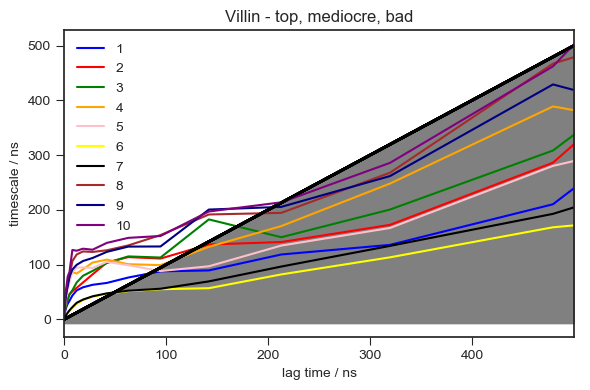

In [197]:
process = [4]

plt.figure(dpi=100)
plot_implied_timescales(all_itss[0], ylog=False, dt=0.2, units='ns', process=process, colors=['blue'], show_mean=True, label='1')
plot_implied_timescales(all_itss[1], ylog=False, dt=0.2, units='ns', process=process, colors=['red'], show_mean=True, label='2')
plot_implied_timescales(all_itss[2], ylog=False, dt=0.2, units='ns', process=process, colors=['green'], show_mean=True, label='3')
plot_implied_timescales(all_itss[3], ylog=False, dt=0.2, units='ns', process=process, colors=['orange'], show_mean=True, label='4')
plot_implied_timescales(all_itss[4], ylog=False, dt=0.2, units='ns', process=process, colors=['pink'], show_mean=True, label='5')
plot_implied_timescales(all_itss[5], ylog=False, dt=0.2, units='ns', process=process, colors=['yellow'], show_mean=True, label='6')
plot_implied_timescales(all_itss[6], ylog=False, dt=0.2, units='ns', process=process, colors=['black'], show_mean=True, label='7')
plot_implied_timescales(all_itss[7], ylog=False, dt=0.2, units='ns', process=process, colors=['brown'], show_mean=True, label='8')
plot_implied_timescales(all_itss[8], ylog=False, dt=0.2, units='ns', process=process, colors=['navy'], show_mean=True, label='9')
plot_implied_timescales(all_itss[9], ylog=False, dt=0.2, units='ns', process=process, colors=['purple'], show_mean=True, label='10')
plt.legend()
#plt.axvline(10, c='red')
plt.title('Villin - top, mediocre, bad')
plt.xticks(np.arange(0,500,100))
#plt.yscale('log')
plt.tight_layout()

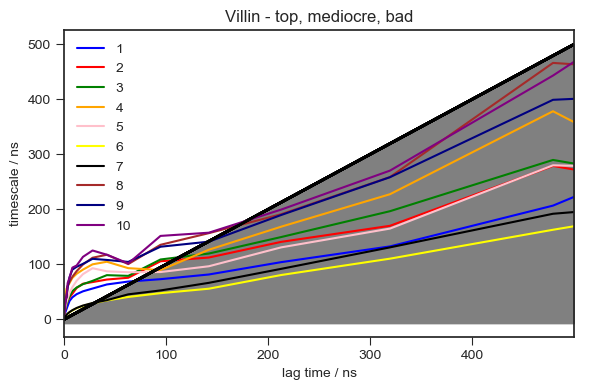

In [198]:
process = [5]

plt.figure(dpi=100)
plot_implied_timescales(all_itss[0], ylog=False, dt=0.2, units='ns', process=process, colors=['blue'], show_mean=True, label='1')
plot_implied_timescales(all_itss[1], ylog=False, dt=0.2, units='ns', process=process, colors=['red'], show_mean=True, label='2')
plot_implied_timescales(all_itss[2], ylog=False, dt=0.2, units='ns', process=process, colors=['green'], show_mean=True, label='3')
plot_implied_timescales(all_itss[3], ylog=False, dt=0.2, units='ns', process=process, colors=['orange'], show_mean=True, label='4')
plot_implied_timescales(all_itss[4], ylog=False, dt=0.2, units='ns', process=process, colors=['pink'], show_mean=True, label='5')
plot_implied_timescales(all_itss[5], ylog=False, dt=0.2, units='ns', process=process, colors=['yellow'], show_mean=True, label='6')
plot_implied_timescales(all_itss[6], ylog=False, dt=0.2, units='ns', process=process, colors=['black'], show_mean=True, label='7')
plot_implied_timescales(all_itss[7], ylog=False, dt=0.2, units='ns', process=process, colors=['brown'], show_mean=True, label='8')
plot_implied_timescales(all_itss[8], ylog=False, dt=0.2, units='ns', process=process, colors=['navy'], show_mean=True, label='9')
plot_implied_timescales(all_itss[9], ylog=False, dt=0.2, units='ns', process=process, colors=['purple'], show_mean=True, label='10')
plt.legend()
#plt.axvline(10, c='red')
plt.title('Villin - top, mediocre, bad')
plt.xticks(np.arange(0,500,100))
#plt.yscale('log')
plt.tight_layout()

In [199]:
# process = [6]

# plt.figure(dpi=100)
# plot_implied_timescales(all_itss[0], ylog=False, dt=0.2, units='ns', process=process, colors=['blue'], show_mean=True, label='1')
# plot_implied_timescales(all_itss[1], ylog=False, dt=0.2, units='ns', process=process, colors=['red'], show_mean=True, label='2')
# plot_implied_timescales(all_itss[2], ylog=False, dt=0.2, units='ns', process=process, colors=['green'], show_mean=True, label='3')
# plot_implied_timescales(all_itss[3], ylog=False, dt=0.2, units='ns', process=process, colors=['orange'], show_mean=True, label='4')
# plot_implied_timescales(all_itss[4], ylog=False, dt=0.2, units='ns', process=process, colors=['pink'], show_mean=True, label='5')
# plot_implied_timescales(all_itss[5], ylog=False, dt=0.2, units='ns', process=process, colors=['yellow'], show_mean=True, label='6')
# plot_implied_timescales(all_itss[6], ylog=False, dt=0.2, units='ns', process=process, colors=['black'], show_mean=True, label='7')
# plot_implied_timescales(all_itss[7], ylog=False, dt=0.2, units='ns', process=process, colors=['brown'], show_mean=True, label='8')
# plot_implied_timescales(all_itss[8], ylog=False, dt=0.2, units='ns', process=process, colors=['navy'], show_mean=True, label='9')
# plot_implied_timescales(all_itss[9], ylog=False, dt=0.2, units='ns', process=process, colors=['purple'], show_mean=True, label='10')
# plt.legend()
# #plt.axvline(10, c='red')
# plt.title('Villin - top, mediocre, bad')
# plt.xticks(np.arange(0,500,100))
# #plt.yscale('log')
# plt.tight_layout()

In [51]:
# process = [7]

# plt.figure(dpi=100)
# plot_implied_timescales(all_itss[0], ylog=False, dt=0.2, units='ns', process=process, colors=['blue'], show_mean=True, label='1')
# plot_implied_timescales(all_itss[1], ylog=False, dt=0.2, units='ns', process=process, colors=['red'], show_mean=True, label='2')
# plot_implied_timescales(all_itss[2], ylog=False, dt=0.2, units='ns', process=process, colors=['green'], show_mean=True, label='3')
# plot_implied_timescales(all_itss[3], ylog=False, dt=0.2, units='ns', process=process, colors=['orange'], show_mean=True, label='4')
# plot_implied_timescales(all_itss[4], ylog=False, dt=0.2, units='ns', process=process, colors=['pink'], show_mean=True, label='5')
# plot_implied_timescales(all_itss[5], ylog=False, dt=0.2, units='ns', process=process, colors=['yellow'], show_mean=True, label='6')
# plot_implied_timescales(all_itss[6], ylog=False, dt=0.2, units='ns', process=process, colors=['black'], show_mean=True, label='7')
# plot_implied_timescales(all_itss[7], ylog=False, dt=0.2, units='ns', process=process, colors=['brown'], show_mean=True, label='8')
# plot_implied_timescales(all_itss[8], ylog=False, dt=0.2, units='ns', process=process, colors=['navy'], show_mean=True, label='9')
# plot_implied_timescales(all_itss[9], ylog=False, dt=0.2, units='ns', process=process, colors=['purple'], show_mean=True, label='10')
# plt.legend()
# #plt.axvline(10, c='red')
# plt.title('Villin - top, mediocre, bad')
# plt.xticks(np.arange(0,500,100))
# #plt.yscale('log')
# plt.tight_layout()

In [53]:
# CK tests

In [55]:
all_msms = []

In [56]:
for dtrajs in all_dtrajs:
    msm = pyemma.msm.estimate_markov_model(list(dtrajs), 100*5)
    all_msms.append(msm)

In [57]:
all_cktests = []

In [58]:
for msm in all_msms:
    cktest = msm.cktest(3, mlags=np.arange(0,59,5))
    all_cktests.append(cktest)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=11), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=11), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=11), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=11), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=11), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=11), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=11), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=11), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=11), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=11), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

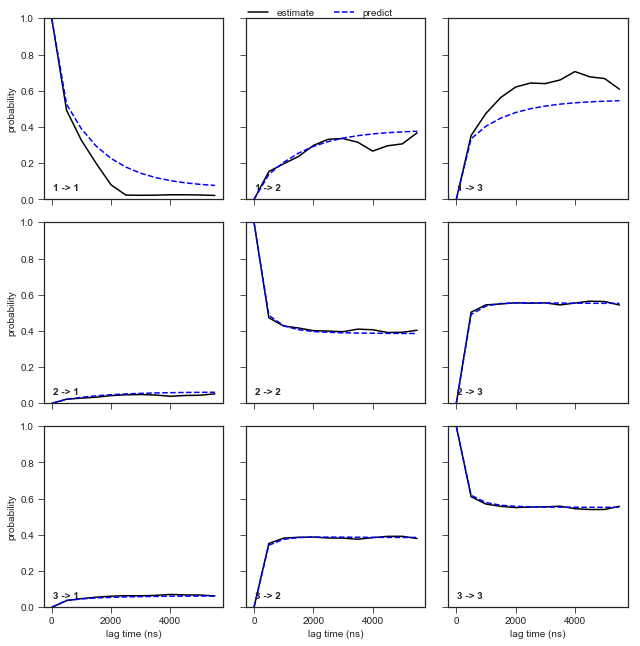

In [68]:
plt.figure()
pyemma.plots.plot_cktest(all_cktests[9], units='ns', dt=0.2)
plt.tight_layout()

In [69]:
# ACFs

In [70]:
from statsmodels.tsa.stattools import acf

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [72]:
for msm in all_msms:
    msm.pcca(3)

In [73]:
all_msms[0].pcca(3).coarse_grained_stationary_probability

array([ 0.06439895,  0.32623023,  0.60937082])

In [74]:
traj = []

for state in all_dtrajs[0][0]:
    if state in all_msms[0].metastable_sets[0]:
        traj.append(0)
    elif state in all_msms[0].metastable_sets[1]:
        traj.append(1)
    elif state in all_msms[0].metastable_sets[2]:
        traj.append(2)
    else:
        raise Exception('Something wrong')

In [76]:
from collections import Counter

In [77]:
Counter(traj)[0] / len(traj)

0.0499500722240714

In [78]:
Counter(traj)[1] / len(traj)

0.23909432447798798

In [79]:
Counter(traj)[2] / len(traj)

0.7109556032979406

In [85]:
all_msms[0].pcca(3).coarse_grained_stationary_probability

array([ 0.06439895,  0.32623023,  0.60937082])

In [84]:
all_msms[5].pcca(3).coarse_grained_stationary_probability

array([ 0.05770502,  0.25148874,  0.69080624])

In [86]:
# GOTTA LOOK AT POPULATIONS TOO - see difference above - within error?

In [87]:
raw_acf, confint = acf(traj, nlags=20000, fft=True, alpha=0.05)

In [88]:
def plot_band(x, y, yerr, alpha=0.5, color=None, label=None):
    plt.plot(x, y, color=color, label=label)
    plt.fill_between(x, y - yerr, y + yerr, alpha=alpha, color=color)

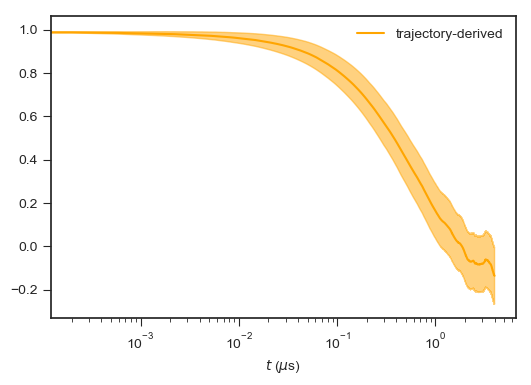

In [91]:
plt.figure(dpi=100)
#x = msm_acfs[i][0][0]
#mean = np.mean([s[1] for s in msm_acfs[i]], 0)
#stdev = np.std([s[1] for s in msm_acfs[i]], 0)
plt.xlabel(r'$t$ ' + r'($\mu$s)')

#plot_band(np.array(x) * 0.0002, mean, 1.96 * stdev, label='MSM-derived')
plot_band(np.arange(len(raw_acf)) * 0.0002, raw_acf, np.abs(confint[:,1] - confint[:,0])/2, color='orange', label='trajectory-derived')
plt.legend()
plt.xscale('log')

In [93]:
# actually this is now what we're after - but interesting autocorrelation from 3-state labels - looks awfully the same
# as chignolin 2-state

In [94]:
# let's now do it right with projecting on eigenvectors

In [164]:
# for index in range(10):

#     model_index = index

#     traj = []
#     msm = all_msms[model_index]
#     eigenv = msm.eigenvectors_right()[:,1]

#     for state in all_dtrajs[model_index][0]:
#         traj.append(eigenv[state])

#     raw_acf, confint = acf(traj, nlags=50000, fft=True, alpha=0.05)    
#     msm_acf = msm.correlation(eigenv, maxtime=50000)

#     plt.figure(dpi=100)
#     plt.xlabel(r'$t$ ' + r'($\mu$s)')

#     plt.plot(msm_acf[0]*0.0002, msm_acf[1], color='blue', label='MSM-derived')
#     plot_band(np.arange(len(raw_acf)) * 0.0002, raw_acf, np.abs(confint[:,1] - confint[:,0])/2, color='orange', label='trajectory-derived')
#     plt.legend()
#     plt.xscale('log')

In [118]:
# so no differences really - let's see at shorter lag times - try 10 ns and 50 ns

In [119]:
all_msms_10 = []

In [120]:
for dtrajs in all_dtrajs:
    msm = pyemma.msm.estimate_markov_model(list(dtrajs), 10*5)
    all_msms_10.append(msm)

In [ ]:
all_cktests = []

In [ ]:
for msm in all_msms:
    cktest = msm.cktest(3, mlags=np.arange(0,59,5))
    all_cktests.append(cktest)

In [ ]:
plt.figure()
pyemma.plots.plot_cktest(all_cktests[9], units='ns', dt=0.2)
plt.tight_layout()

In [173]:
# for index in range(10):

#     model_index = index

#     traj = []
#     msm = all_msms_10[model_index]
#     eigenv = msm.eigenvectors_right()[:,1]

#     for state in all_dtrajs[model_index][0]:
#         traj.append(eigenv[state])

#     raw_acf, confint = acf(traj, nlags=50000, fft=True, alpha=0.05)    
#     msm_acf = msm.correlation(eigenv, maxtime=50000)

#     plt.figure(dpi=100)
#     plt.xlabel(r'$t$ ' + r'($\mu$s)')

#     plt.plot(msm_acf[0]*0.0002, msm_acf[1], color='blue', label='MSM-derived')
#     plot_band(np.arange(len(raw_acf)) * 0.0002, raw_acf, np.abs(confint[:,1] - confint[:,0])/2, color='orange', label='trajectory-derived')
#     plt.legend()
#     plt.xscale('log')

In [133]:
# at 10 ns still good - let's go lower

In [134]:
all_msms_1 = []

for dtrajs in all_dtrajs:
    msm = pyemma.msm.estimate_markov_model(list(dtrajs), 1*5)
    all_msms_1.append(msm)

In [187]:
# for index in range(10):

#     model_index = index

#     traj = []
#     msm = all_msms_1[model_index]
#     eigenv = msm.eigenvectors_right()[:,10]

#     for state in all_dtrajs[model_index][0]:
#         traj.append(eigenv[state])

#     raw_acf, confint = acf(traj, nlags=50000, fft=True, alpha=0.05)    
#     msm_acf = msm.correlation(eigenv, maxtime=50000)

#     plt.figure(dpi=100)
#     plt.xlabel(r'$t$ ' + r'($\mu$s)')

#     plt.plot(msm_acf[0]*0.0002, msm_acf[1], color='blue', label='MSM-derived')
#     plot_band(np.arange(len(raw_acf)) * 0.0002, raw_acf, np.abs(confint[:,1] - confint[:,0])/2, color='orange', label='trajectory-derived')
#     plt.legend()
#     plt.xscale('log')

In [140]:
all_msms_5 = []

for dtrajs in all_dtrajs:
    msm = pyemma.msm.estimate_markov_model(list(dtrajs), 5*5)
    all_msms_5.append(msm)

In [185]:
# for index in range(10):

#     model_index = index

#     traj = []
#     msm = all_msms_5[model_index]
#     eigenv = msm.eigenvectors_right()[:,1]

#     for state in all_dtrajs[model_index][0]:
#         traj.append(eigenv[state])

#     raw_acf, confint = acf(traj, nlags=50000, fft=True, alpha=0.05)    
#     msm_acf = msm.correlation(eigenv, maxtime=50000)

#     plt.figure(dpi=100)
#     plt.xlabel(r'$t$ ' + r'($\mu$s)')

#     plt.plot(msm_acf[0]*0.0002, msm_acf[1], color='blue', label='MSM-derived')
#     plot_band(np.arange(len(raw_acf)) * 0.0002, raw_acf, np.abs(confint[:,1] - confint[:,0])/2, color='orange', label='trajectory-derived')
#     plt.legend()
#     plt.xscale('log')

In [143]:
# ok so nothing interesting here really...

In [146]:
# let's look at further eigenvectors - just going to do that above

In [ ]:
# nothing there either - moving onto trp-cage